# Toy Problem for GMVR

In [12]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from numpy import *
import numpy as np
from positive import *
from matplotlib.pyplot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2D Example with noise 

In [65]:
################################################################################
h = 3
Q = 25
x = h*linspace(-1,1,Q) 
y = h*linspace(-1,1,Q) 
X,Y = meshgrid(x,y)

# Optionally add noise to domain
# X += np.random.random( X.shape )-0.5
# Y += np.random.random( X.shape )-0.5

zfun = lambda xx,yy: 50 + (1.0 + (xx+0.5)*(yy+0.2)) / ( 0.9 + xx**2 + yy**2 )
numerator_symbols, denominator_symbols = ['01','0','1'], ['00','11'] 

# zfun = lambda xx,yy: 50 + (1.0 + 2*xx*yy - (xx+0.1)*(yy+0.2)) 
# numerator_symbols, denominator_symbols = ['01','0','1'], ['K'] 

np.random.seed(42)
ns = 0.1*(np.random.random( X.shape )-0.5)
Z = zfun(X,Y) + ns
Z_validation = []
for k in range(500):
    ns = 0.1*(np.random.random( X.shape )-0.5)
    Z_validation.append( zfun(X,Y) + ns )
    
domain,scalar_range = ndflatten( [X,Y], Z )
################################################################################

### Use Greedy Algorithm -- GMVR

In [66]:
star = gmvrfit( domain, scalar_range )

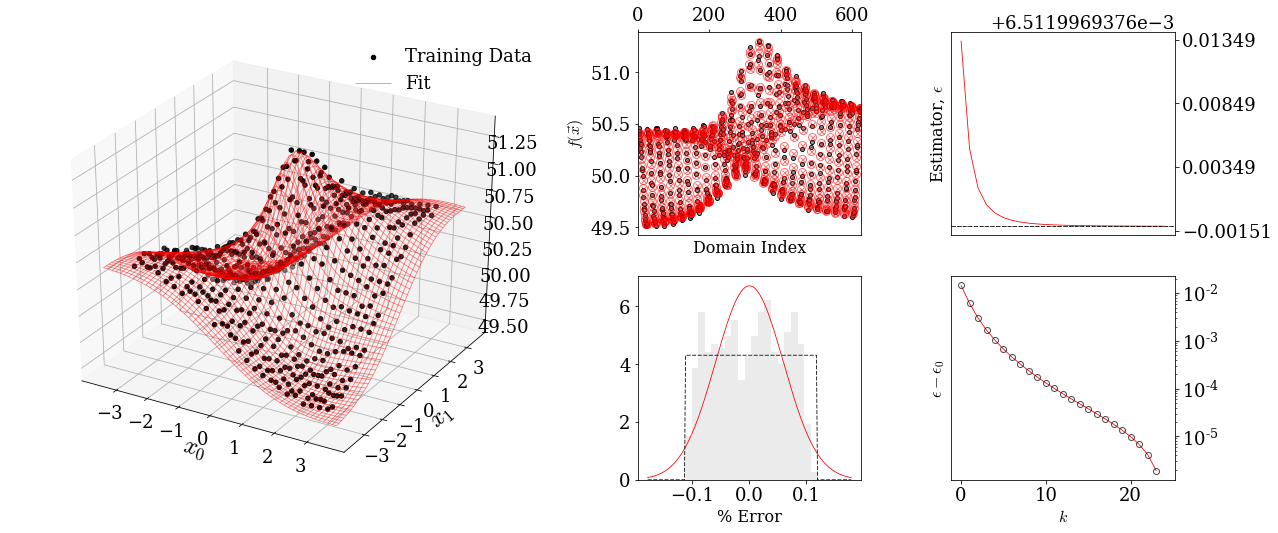

In [88]:
star.plot()
savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/issue3_summary.pdf',pad_inches=0, bbox_inches='tight')

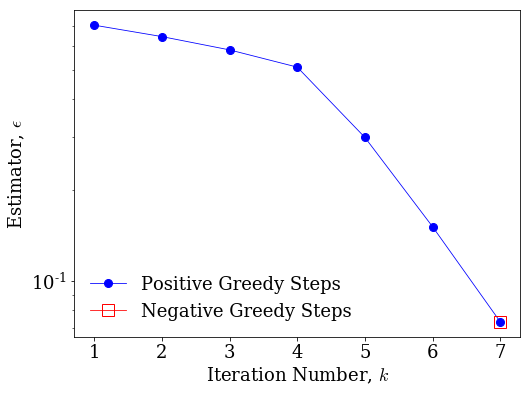

In [96]:
# Plot convergence of greedy process
fig = star.bin['ngreedy_result'].plot()
title('')
xlabel('Iteration Number, $k$',size=18)
ylabel(r'Estimator, $\epsilon$',size=18)
savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/issue3_pgreedy.pdf',pad_inches=0, bbox_inches='tight')

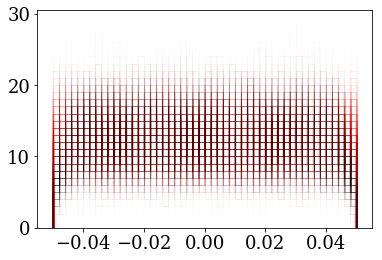

In [68]:

counts = []
counts0 = []
N = 50
for k in range(len(Z_validation)):

    domain,ZZ = ndflatten( [X,Y], Z_validation[k] )
    domain,Z0 = ndflatten( [X,Y], zfun(X,Y) )
    res0 = Z0 - ZZ
    res = star.eval(star.domain) - ZZ

    c,bins,other = hist(res0,N,histtype='step',color='r',alpha=0.01)
    counts.append(c)  
    c,bins0,other = hist(res,bins=bins,histtype='step',color='k',alpha=0.01)
    counts0.append(c)

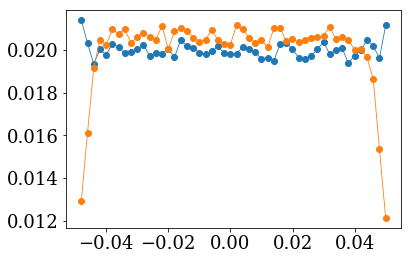

In [69]:
# plot(sum(counts)/len(counts),'-o')
a = sum(counts,axis=0)/sum(sum(counts,axis=0))
b = sum(counts0,axis=0)/sum(sum(counts0,axis=0))

plot( bins[1:], sum(counts,axis=0)/sum(sum(counts,axis=0)), '-o' )
plot( bins[1:], sum(counts0,axis=0)/sum(sum(counts0,axis=0)), '-o' )

0.994614576394
10


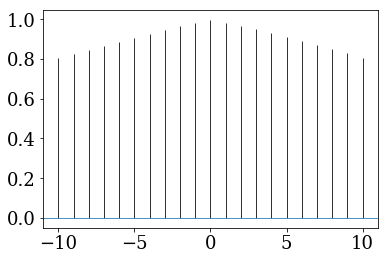

In [70]:
vals = xcorr(a,b,normed=True)
print max(vals[1])
print argmax(vals[1])

### Notes

 * The greedy tolerance is the sole hyper, and has direct impact on which basis symbols are selected.
 * The negative greedy tolerance is a function of the late stage behavior of the greedy tolerance, and may result in a representation error slightly larger than the input tolerance
 * the accuracy of the fit may be framed as how well the model residuals recover the input noise distribution; in this case the "match" is 0.994015838784